<span style="background-color:red">BVH:MC: author needs to add figure labels</span>

***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathematical Groundwork](2_0_introduction.ipynb)
    * Previous: [2.4 The Fourier Transform](2_4_the_fourier_transform.ipynb)
    * Next: [2.6 Cross-correlation and auto-correlation](2_6_cross_correlation_and_auto_correlation.ipynb)

***

Import standard modules:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [9]:
import math

In [10]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

## 2.5. Convolution<a id='math:sec:convolution'></a>

The convolution is an operation connecting two functions, with the result of a mutual broadening. In signal processing, the convolution is often used to represent instrumental broadening of a signal. For any observation, the signal received is "filtered" by an instrumental function. The signal is smeared out. The mathematical description for this effect is the convolution of the function representing the original signal with the instrumental function. In this chapter, we give a detailed description.

### 2.5.1. Definition of the convolution<a id='math:sec:definition_of_the_convolution'></a>

The convolution $\circ$ is an operation acting on two complex-valued functions.

<a id='math:eq:5_001'></a><!--\label{math:eq:5_001}-->$$
\circ: \left\{f\,|\, f:\mathbb{R}\rightarrow \mathbb{C}\right\}\,\times\, \left\{f\,|\, f:\mathbb{R}\rightarrow \mathbb{C}\right\} \rightarrow \left\{f\,|\, f:\mathbb{R}\rightarrow \mathbb{C}\right\}\\
(f\circ g)(x) \,=\, \int_{-\infty}^{+\infty} f(x-t)\,g(t)\,dt
$$

or, in more than one dimension

<a id='math:eq:5_002'></a><!--\label{math:eq:5_002}-->$$
\circ: \left\{f\,|\, f:\mathbb{R}^n\rightarrow \mathbb{C}\right\}\,\times\, \left\{f\,|\, f:\mathbb{R}^n\rightarrow \mathbb{C}\right\} \rightarrow \left\{f\,|\, f:\mathbb{R}^n\rightarrow \mathbb{C}\right\} \, \quad n \in \mathbb{N}\\
\begin{align}
(f\circ g)(x_1,\ldots,x_n ) \,&=\, (f\circ g)({\bf x})\\
\,&=\, \int_{-\infty}^{+\infty} \ldots \int_{-\infty}^{+\infty} f(x_1-t_1, \ldots , x_n-t_n)\,g(t_1, \ldots, t_n) \,d^nt\\
\,&=\, \int_{-\infty}^{+\infty} f({\bf x}-{\bf t})\,g({\bf t}) \,d^nt\end{align}
$$

### 2.5.2. Properties of the convolution<a id='math:sec:properties_of_the_convolution'></a>

The following rules apply:

<a id='math:eq:5_003'></a><!--\label{math:eq:5_003}-->$$
\forall\,f,g\in \left\{h\,|\, h:\mathbb{R}\rightarrow \mathbb{C}\right\}, \quad a \in \mathbb{C}\\
\begin{align}
f\circ g \,&=\, g \circ f&\qquad (\text{commutativity})\\
(f\circ g)\circ h \,&=\, f \circ (g\circ h)&\qquad (\text{assiociativity})\\
f \circ (g + h) \,&=\, (f \circ g) + (f\circ h) &\qquad (\text{distributivity})\\
(a\, g)\circ h \,&=\, a \, (g\circ h)&\qquad (\text{assiociativity with scalar multiplication})\\
\end{align}
$$

Because (in one dimenstion, to keep it short)

<a id='math:eq:5_002'></a><!--\label{math:eq:5_002}-->$$
\begin{split}
(f\circ g)(x) \,&=\, \int_{-\infty}^{+\infty} f(x-t)\,g(t)\,dt\\
&\underset{t^{\prime} = x - t}{=}\, \int_{\infty}^{-\infty} f(t^{\prime})\,g(x-t^{\prime})\,\frac{dt}{dt^{\prime}}dt^{\prime}\\
&=\, - \int_{-\infty}^{+\infty} f(t^{\prime})\,g(x-t^{\prime})(-1)\,dt'\\
&= (g\circ f)(x)\\
((f\circ g)\circ h)(x) \,&=\, \int_{-\infty}^{+\infty} \left[\int_{-\infty}^{+\infty} f((x-t^{\prime})-t)\,g(t)\,dt\right]\,h(t^\prime)\,dt^{\prime}\\
&=\, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} f(x-t -t^{\prime})\,g(t)\,h(t^\prime)\,dt\,dt^{\prime}\\
&=\, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} f((x-t) -t^{\prime})\,h(t^\prime)\,g(t)\,dt^{\prime}\,dt\\
&=\, \int_{-\infty}^{+\infty} \left[\int_{-\infty}^{+\infty} f((x-t) -t^{\prime})\,h(t^\prime)\,dt^{\prime}\right]\,g(t)\,dt\\
&=\, (f\circ (g\circ h))(x)
\end{split}\qquad \rm 
$$

The last two rules can be easily verified.

### 2.5.3. Convolution Examples<a id='math:sec:convolution_examples'></a>

As said, the convolution is often used to represent an instrumental function. We want to demonstrate this. Let us assume a simple function, the triangle wave and a rectangle function (scaled to an area of 1). If we convolve them we get this:

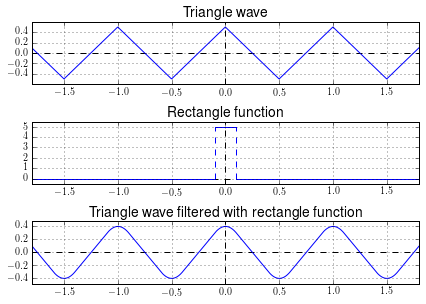

In [11]:
import math

from matplotlib import rcParams
rcParams['text.usetex'] = True

#def trianglewave(x, T):
#    """
#    This is a sawtooth, though
#    """
#    return np.mod(x/T,1.)*np.logical_and(x>=0,x<=T)

def trianglewave(x, T):
    """
    T is the period.
    """
    return np.abs(2.*(np.mod(x/T,1.)-0.5))-0.5

def boxcar(x,a,b,amp):
    return amp*np.logical_and(x>=a,x<=b)
    
def plottriboxconv(a, b, period):

    # limits of boxcar Play arround with this
#    a = -0.1
#    b = 0.1
    
    # Plotting range
    xrange = [-2., 2.]

    # Create functions
    xpoints = 1000
   
    # Resolution element
    dx = (xrange[1]-xrange[0])/float(xpoints)

    x = np.linspace(xrange[0], xrange[1], xpoints)
    y = boxcar(x, a, b, 1.)

    # boxcar will be normalised to 1. amp = 1./(b-a) works in the limit of many points, but here we do
    # numberofpixelsinbox*dx*amplitude = y.sum *dx*amplitude = 1
    # to take into account numerical effects
    amp = float(xpoints)/((xrange[1]-xrange[0])* y.sum())
    y = boxcar(x, a, b, 1./(b-a))
    ycorr = boxcar(x, a, b, amp)
    z = trianglewave(x, period)

    result = np.convolve(ycorr,z,'same')
    result = dx*result
        
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    ax1  = fig.add_subplot(311)
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.6)
    
    # Axis ranges
    ax1.axis([xrange[0]+(b-a), xrange[1]-(b-a), z.min()-0.1*(z.max()-z.min()), z.max()+0.1*(z.max()-z.min())])

    # Plot a grid
    ax1.grid(True)

    # Insert lines at x=0 and y=0
    ax1.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax1.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax1.plot(x,z,'b-')

    plt.title("Triangle wave", fontsize=14,color='black')
    
    ax2  = fig.add_subplot(312, sharex=ax1) 

    # Axis ranges
    ax2.axis([xrange[0]+(b-a), xrange[1]-(b-a), ycorr.min()-0.1*(ycorr.max()-ycorr.min()), \
              ycorr.max()+0.1*(ycorr.max()-ycorr.min())])

    # Plot a grid
    ax2.grid(True)

    # Insert lines at x=0 and y=0
    ax2.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax2.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    e1 = int(math.ceil(xpoints*(a-xrange[0])/(xrange[1]-xrange[0])))
    ax2.plot(x[:e1],y[:e1],'b-')
    ax2.plot([a, a],[0., amp],'b--')
    e2 = int(math.floor(xpoints*(b-xrange[0])/(xrange[1]-xrange[0])))
    ax2.plot(x[e1:e2],y[e1:e2],'b-')
    e3 = xpoints
    ax2.plot(x[e2:],y[e2:],'b-')
    ax2.plot([b, b],[0., amp],'b--')

    plt.title("Rectangle function", fontsize=14,color='black')
    
    ax3  = fig.add_subplot(313, sharex=ax2) 

    # Axis ranges: mask out border effects
    rmin = result.min()
    rmax = result.max()
    
    # Just to make the result a bit more beautiful if the function is very flat
    if (rmax - rmin) < 0.1:
        rmin=rmin-0.1
        rmax=rmax+0.1

    ax3.axis([xrange[0]+(b-a), xrange[1]-(b-a), rmin-0.1*(rmax-rmin), rmax+0.1*(rmax-rmin)])

    # Plot a grid
    ax3.grid(True)

    # Insert lines at x=0 and y=0
    ax3.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax3.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    plr1 =  int(xpoints*(b-a)/(xrange[1]-xrange[0]))
    plr2 =  int(xpoints*(1-(b-a)/(xrange[1]-xrange[0])))
    
    ax3.plot(x[plr1:plr2],result[plr1:plr2],'b-')

    plt.title("Triangle wave filtered with rectangle function", fontsize=14,color='black')
        
# first two arguments give the position of the rectangle, third the period of the Triangle
plottriboxconv(-0.1, 0.1, 1.0)

**Figure 2.5.1:** Rectangle-filtered triangle wave

 One might assume that one is observing a (co-)sine function. But it can get worse: 

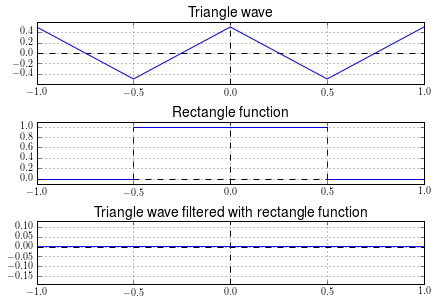

In [12]:
# first two arguments give the position of the rectangle, third the period of the Triangle
plottriboxconv(-0.5, 0.5, 1.0)

**Figure 2.5.2:**

This example illustrates that the process of filtering can destroy information about our signal. However, filtering can also be useful. Given noisy observations of a function, a rectangle function can be used to filter out the noise. This is illustrated in the subsequent example. 

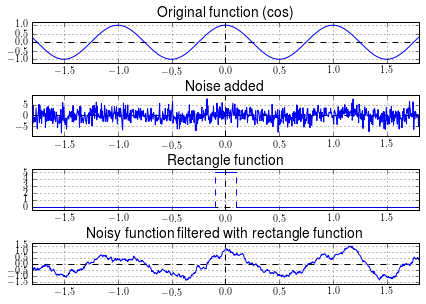

In [13]:
from matplotlib import rcParams
rcParams['text.usetex'] = True

def noisycosinewave(x, amplitude, T, sigma):
    """
    T is the period, sigma is the dispersion, amplitude the amplitude
    """
    return amplitude*np.cos(2.*math.pi*x/T)+np.random.normal(scale=sigma, size=x.size)

def boxcar(x,a,b,amp):
    return amp*np.logical_and(x>=a,x<=b)
    
def plotcosboxconv(a, b, period, sigma):

    # limits of boxcar Play arround with this
#    a = -0.1
#    b = 0.1
    
    # Plotting range
    xrange = [-2., 2.]

    # Create functions
    xpoints = 1000
   
    # Resolution element
    dx = (xrange[1]-xrange[0])/float(xpoints)

    x = np.linspace(xrange[0], xrange[1], xpoints)
    y = boxcar(x, a, b, 1.)

    # boxcar will be normalised to 1. amp = 1./(b-a) works in the limit of many points, but here we do
    # numberofpixelsinbox*dx*amplitude = y.sum *dx*amplitude = 1
    # to take into account numerical effects
    amp = float(xpoints)/((xrange[1]-xrange[0])* y.sum())
    y = boxcar(x, a, b, 1./(b-a))
    ycorr = boxcar(x, a, b, amp)
    z = noisycosinewave(x, 1., period, sigma)
    c = np.cos(2.*math.pi*x/period)
    
    result = np.convolve(ycorr,z,'same')
    result = dx*result
        
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    
    ax1  = fig.add_subplot(411)
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.8)
    
    # Axis ranges
    ax1.axis([xrange[0]+(b-a), xrange[1]-(b-a), c.min()-0.1*(c.max()-c.min()), c.max()+0.1*(c.max()-c.min())])

    # Plot a grid
    ax1.grid(True)

    # Insert lines at x=0 and y=0
    ax1.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax1.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax1.plot(x,c,'b-')

    plt.title("Original function (cos)", fontsize=14,color='black')

    ax1  = fig.add_subplot(412)
 
    # Axis ranges
    ax1.axis([xrange[0]+(b-a), xrange[1]-(b-a), z.min()-0.1*(z.max()-z.min()), z.max()+0.1*(z.max()-z.min())])

    # Plot a grid
    ax1.grid(True)

    # Insert lines at x=0 and y=0
    ax1.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax1.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax1.plot(x,z,'b-')

    plt.title("Noise added", fontsize=14,color='black')
    
    ax2  = fig.add_subplot(413, sharex=ax1) 

    # Axis ranges
    ax2.axis([xrange[0]+(b-a), xrange[1]-(b-a), ycorr.min()-0.1*(ycorr.max()-ycorr.min()), \
              ycorr.max()+0.1*(ycorr.max()-ycorr.min())])

    # Plot a grid
    ax2.grid(True)

    # Insert lines at x=0 and y=0
    ax2.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax2.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    e1 = int(math.ceil(xpoints*(a-xrange[0])/(xrange[1]-xrange[0])))
    ax2.plot(x[:e1],y[:e1],'b-')
    ax2.plot([a, a],[0., amp],'b--')
    e2 = int(math.floor(xpoints*(b-xrange[0])/(xrange[1]-xrange[0])))
    ax2.plot(x[e1:e2],y[e1:e2],'b-')
    e3 = xpoints
    ax2.plot(x[e2:],y[e2:],'b-')
    ax2.plot([b, b],[0., amp],'b--')

    plt.title("Rectangle function", fontsize=14,color='black')
    
    ax3  = fig.add_subplot(414, sharex=ax2) 

    # Axis ranges: mask out border effects
    rmin = result.min()
    rmax = result.max()
    
    # Just to make the result a bit more beautiful if the function is very flat
    if (rmax - rmin) < 0.1:
        rmin=rmin-0.1
        rmax=rmax+0.1

    ax3.axis([xrange[0]+(b-a), xrange[1]-(b-a), rmin-0.1*(rmax-rmin), rmax+0.1*(rmax-rmin)])

    # Plot a grid
    ax3.grid(True)

    # Insert lines at x=0 and y=0
    ax3.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax3.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    plr1 =  int(xpoints*(b-a)/(xrange[1]-xrange[0]))
    plr2 =  int(xpoints*(1-(b-a)/(xrange[1]-xrange[0])))
    
    ax3.plot(x[plr1:plr2],result[plr1:plr2],'b-')

    plt.title("Noisy function filtered with rectangle function", fontsize=14,color='black')
        
# first two arguments give the position of the rectangle, third the period of the Triangle
plotcosboxconv(-0.1, 0.1, 1.0, 2.5)

**Figure 2.5.3:**

Note, that while the signal is not visible in the noisy data, it is partially recovered in the output of the filter.

Representing instrumental functions, it is important to differentiate between the response function in a certain direction and the image of an impulse, which is the reverse of the response function. The function used to represent a measurement via convolution is the image of an impulse function at the origin. This becomes evident, when we convolve two asymmetric functions.

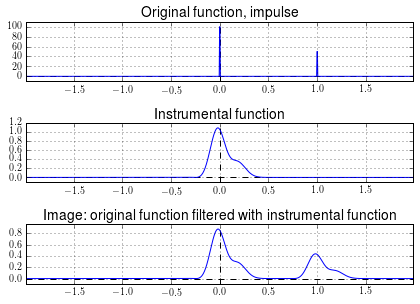

In [14]:
from matplotlib import rcParams
rcParams['text.usetex'] = True

def gausshermetian(x, amp, mu, sigma, h3, h4):
    """
    T is the period, sigma is the dispersion, amplitude the amplitude
    """
    y = (x-mu)/sigma
    return amp*np.exp(-0.5*y**2)*(1+h3*(2*np.sqrt(2.)*y**3-3*np.sqrt(2.)*y)/np.sqrt(6.)+h4*(4*y**4-12*y**2+3)/np.sqrt(24))

#amplitude*np.cos(2.*math.pi*x/T)+np.random.normal(scale=sigma, size=x.size)

def boxcar(x,a,b,amp):
    return amp*np.logical_and(x>=a,x<=b)
    
def plotskewedgaussobs(pos1, pos2, boxwidth, sigma, h3, h4):

    # limits of boxcar Play arround with this
#    a = -0.1
#    b = 0.1
    
    # Plotting range
    xrange = [-2., 2.]

    # Create functions
    xpoints = 1000
   
    # Resolution element
    dx = (xrange[1]-xrange[0])/float(xpoints)

    x = np.linspace(xrange[0], xrange[1], xpoints)
    y = boxcar(x, pos1-boxwidth/2., pos1+boxwidth/2, \
               1./boxwidth)+0.5*boxcar(x, pos2-boxwidth/2., pos2+boxwidth/2, 1./boxwidth)

    # boxcar will be normalised to 1. amp = 1./(b-a) works in the limit of many points, but here we do
    # numberofpixelsinbox*dx*amplitude = y.sum *dx*amplitude = 1
    # to take into account numerical effects
    z = gausshermetian(x, 1., 0., sigma, h3, h4)
    
    result = np.convolve(y,z,'same')
    result = dx*result
        
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
      
    ax1  = fig.add_subplot(311) 
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.7)
 
    # Axis ranges
    ax1.axis([xrange[0]+boxwidth, xrange[1]-boxwidth, y.min()-0.1*(y.max()-y.min()), y.max()+0.1*(y.max()-y.min())])

    # Plot a grid
    ax1.grid(True)

    # Insert lines at x=0 and y=0
    ax1.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax1.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax1.plot(x,y,'b-')

    plt.title("Original function, impulse", fontsize=14,color='black')
    
    ax2  = fig.add_subplot(312, sharex=ax1)
 
    # Axis ranges
    ax2.axis([xrange[0]+boxwidth, xrange[1]-boxwidth, z.min()-0.1*(z.max()-z.min()), z.max()+0.1*(z.max()-z.min())])

    # Plot a grid
    ax2.grid(True)

    # Insert lines at x=0 and y=0
    ax2.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax2.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax2.plot(x,z,'b-')

    plt.title("Instrumental function", fontsize=14,color='black')

    ax3  = fig.add_subplot(313, sharex=ax2) 

    # Axis ranges: mask out border effects
    rmin = result.min()
    rmax = result.max()
    
    ax3.axis([xrange[0]+boxwidth, xrange[1]-boxwidth, rmin-0.1*(rmax-rmin), rmax+0.1*(rmax-rmin)])

    # Plot a grid
    ax3.grid(True)

    # Insert lines at x=0 and y=0
    ax3.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax3.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    plr1 =  int(xpoints*boxwidth/(xrange[1]-xrange[0]))
    plr2 =  int(xpoints*(1-boxwidth/(xrange[1]-xrange[0])))
    
    ax3.plot(x[plr1:plr2],result[plr1:plr2],'b-')

    plt.title("Image: original function filtered with instrumental function", fontsize=14,color='black')
    
# first two arguments give the position of the rectangle, third the period of the Triangle
plotskewedgaussobs(0.0, 1.0, 0.01, 0.1, 0.2, 0.1)

**Figure 2.5.4:**

Would it be the sensitivity at a certain position, the convolution would *not* be  the appropriate operation to describe an experiment. In that case (assuming real-valued functions), the cross-correlation would be the operation of choice.

***

* Next [2.6 Cross-correlation and auto-correlation](2_6_cross_correlation_and_auto_correlation.ipynb)

<div class=warn><b>Future Additions:</b></div>

* add the convolution theorem, it might be some where else but should be here also